In [1]:
library(ggplot2)
library(maps)
library(ggmap)


 # ATTENTION: maps v3.0 has an updated 'world' map.        #
 # Many country borders and names have changed since 1990. #
 # Type '?world' or 'news(package="maps")'. See README_v3. #




In [2]:
statesMap = map_data("state")

In [3]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


In [6]:
summary(statesMap$group)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   15.00   26.00   30.15   47.00   63.00 

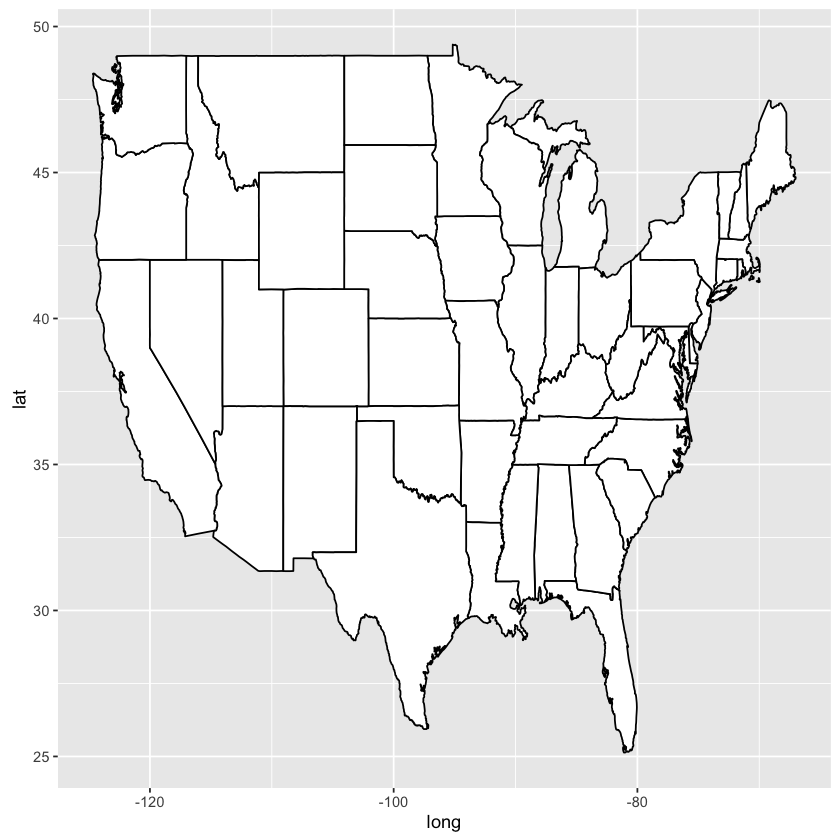

In [7]:
ggplot(statesMap, aes(x = long, y = lat, group = group)) + geom_polygon(fill = "white", color = "black")



In [8]:
polling = read.csv("PollingImputed.csv")

In [9]:
str(polling)

'data.frame':	145 obs. of  7 variables:
 $ State     : Factor w/ 50 levels "Alabama","Alaska",..: 1 1 2 2 3 3 3 4 4 4 ...
 $ Year      : int  2004 2008 2004 2008 2004 2008 2012 2004 2008 2012 ...
 $ Rasmussen : int  11 21 19 16 5 5 8 7 10 13 ...
 $ SurveyUSA : int  18 25 21 18 15 3 5 5 7 21 ...
 $ DiffCount : int  5 5 1 6 8 9 4 8 5 2 ...
 $ PropR     : num  1 1 1 1 1 ...
 $ Republican: int  1 1 1 1 1 1 1 1 1 1 ...


In [12]:
Train = subset(polling, Year >= 2004 & Year <= 2008)
Test = subset(polling, Year >= 2012)

In [13]:
mod2 = glm(Republican~SurveyUSA+DiffCount, data=Train, family="binomial")

TestPrediction = predict(mod2, newdata=Test, type="response")



In [14]:
TestPredictionBinary = as.numeric(TestPrediction > 0.5)



In [15]:
predictionDataFrame = data.frame(TestPrediction, TestPredictionBinary, Test$State)



In [16]:
str(predictionDataFrame)

'data.frame':	45 obs. of  3 variables:
 $ TestPrediction      : num  9.74e-01 9.99e-01 9.26e-05 9.43e-03 3.43e-05 ...
 $ TestPredictionBinary: num  1 1 0 0 0 1 1 0 1 0 ...
 $ Test.State          : Factor w/ 50 levels "Alabama","Alaska",..: 3 4 5 6 7 9 10 11 12 13 ...


In [17]:
table(predictionDataFrame$TestPredictionBinary, Test$Republican)

   
     0  1
  0 23  0
  1  1 21

In [18]:
mean(predictionDataFrame$TestPrediction)

[1] 0.4852626

In [19]:
sum(predictionDataFrame$TestPredictionBinary)

[1] 22

In [20]:
predictionDataFrame$region = tolower(predictionDataFrame$Test.State)

In [21]:
predictionMap = merge(statesMap, predictionDataFrame, by = "region")



In [22]:
predictionMap = predictionMap[order(predictionMap$order),]



In [23]:
str(predictionMap)

'data.frame':	15034 obs. of  9 variables:
 $ region              : chr  "arizona" "arizona" "arizona" "arizona" ...
 $ long                : num  -115 -115 -115 -115 -115 ...
 $ lat                 : num  35 35.1 35.1 35.2 35.2 ...
 $ group               : num  2 2 2 2 2 2 2 2 2 2 ...
 $ order               : int  204 205 206 207 208 209 210 211 212 213 ...
 $ subregion           : chr  NA NA NA NA ...
 $ TestPrediction      : num  0.974 0.974 0.974 0.974 0.974 ...
 $ TestPredictionBinary: num  1 1 1 1 1 1 1 1 1 1 ...
 $ Test.State          : Factor w/ 50 levels "Alabama","Alaska",..: 3 3 3 3 3 3 3 3 3 3 ...


In [24]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


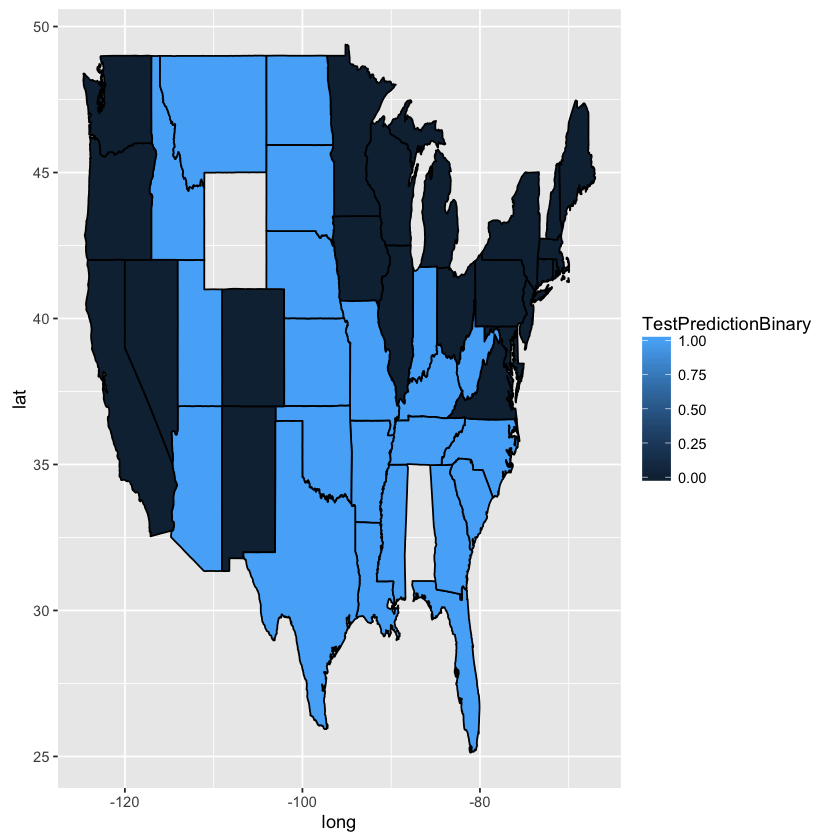

In [25]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary)) + geom_polygon(color = "black")



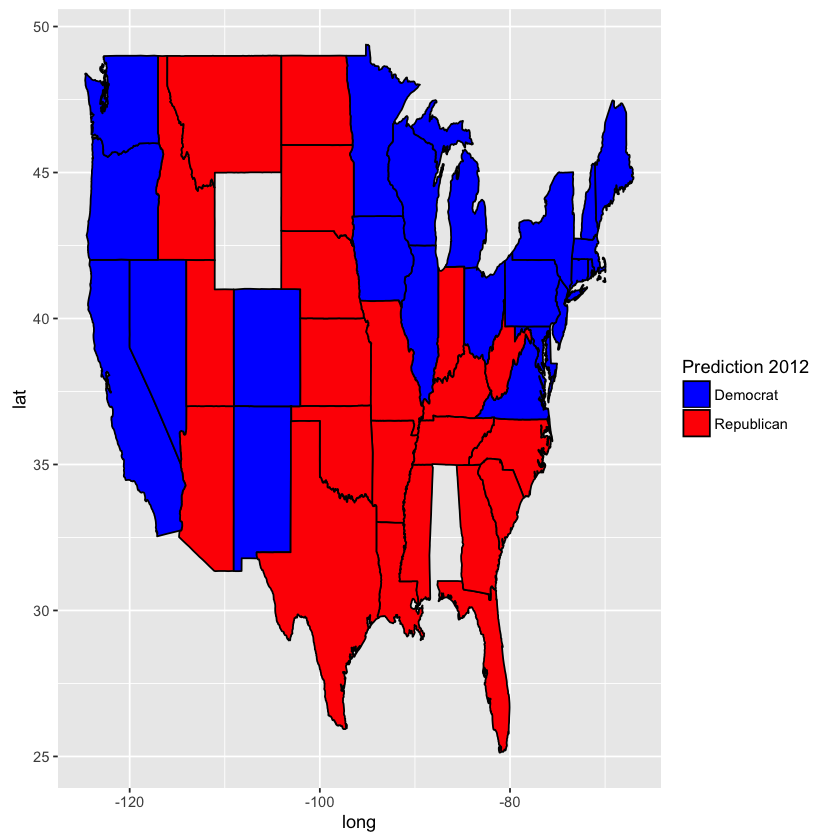

In [26]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPredictionBinary))+ geom_polygon(color = "black") + scale_fill_gradient(low = "blue", high = "red", guide = "legend", breaks= c(0,1), labels = c("Democrat", "Republican"), name = "Prediction 2012")

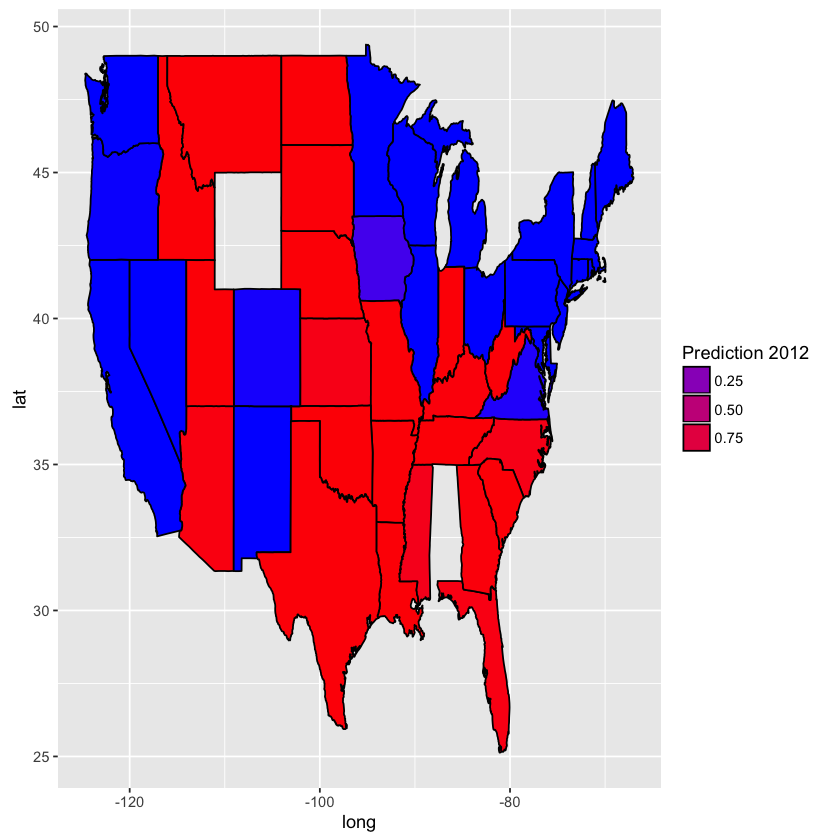

In [29]:
ggplot(predictionMap, aes(x = long, y = lat, group = group, fill = TestPrediction))+ geom_polygon(color = "black") + scale_fill_gradient(low = "blue", high = "red", guide = "legend", name = "Prediction 2012")

In [30]:
florida = subset(predictionDataFrame, Test.State= Florida)

In [31]:
florida

,TestPrediction,TestPredictionBinary,Test.State,region
7,0.9739028,1,Arizona,arizona
10,0.9994949,1,Arkansas,arkansas
13,9.261522e-05,0,California,california
16,0.009432967,0,Colorado,colorado
19,3.431627e-05,0,Connecticut,connecticut
24,0.9640395,1,Florida,florida
27,0.990168,1,Georgia,georgia
30,4.779656e-05,0,Hawaii,hawaii
33,0.9996372,1,Idaho,idaho
36,9.262188e-05,0,Illinois,illinois


In [32]:
?geom_polygon

geom_polygon {ggplot2},R Documentation
mapping,"Set of aesthetic mappings created by aes or aes_. If specified and inherit.aes = TRUE (the default), it is combined with the default mapping at the top level of the plot. You must supply mapping if there is no plot mapping."
data,"The data to be displayed in this layer. There are three options: If NULL, the default, the data is inherited from the plot data as specified in the call to ggplot. A data.frame, or other object, will override the plot data. All objects will be fortified to produce a data frame. See fortify for which variables will be created. A function will be called with a single argument, the plot data. The return value must be a data.frame., and will be used as the layer data."
stat,"The statistical transformation to use on the data for this layer, as a string."
position,"Position adjustment, either as a string, or the result of a call to a position adjustment function."
...,"other arguments passed on to layer. These are often aesthetics, used to set an aesthetic to a fixed value, like color = ""red"" or size = 3. They may also be parameters to the paired geom/stat."
na.rm,"If FALSE (the default), removes missing values with a warning. If TRUE silently removes missing values."
show.legend,"logical. Should this layer be included in the legends? NA, the default, includes if any aesthetics are mapped. FALSE never includes, and TRUE always includes."
inherit.aes,"If FALSE, overrides the default aesthetics, rather than combining with them. This is most useful for helper functions that define both data and aesthetics and shouldn't inherit behaviour from the default plot specification, e.g. borders."
